<a href="https://colab.research.google.com/github/MiljanaKomazec/PPPO---Ultrasound-Nerve-Segmentation/blob/main/Ultrasound_Nerve_Segmentation_V9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projektni zadatak iz predmeta Principi prezentacije i prepoznavanje oblika**
## Tema: Ultrasound Nerve Segmentation

**Segmentacija nervnih struktura u medicini**


Segmentacija nervnih struktura predstavlja ključan aspekt istraživanja i kliničke prakse, igrajući presudnu ulogu u dijagnostici, istraživanju mozga, neurohirurgiji, analizi funkcionalnih slika mozga, praćenju bolesti i razvoju terapeutskih intervencija. Precizna identifikacija i lokalizacija anatomskih regija na slikama dobijenim putem različitih medicinskih modaliteta, poput magnetne rezonance (MRI) i računarske tomografije (CT), omogućava lekarima, istraživačima i hirurzima da dublje razumeju strukturu mozga, dijagnostikuju neurološke poremećaje i planiraju terapeutske intervencije. U medicinskoj dijagnostici, segmentacija nervnih struktura omogućava precizno i brzo identifikovanje patoloških promena, poput tumora, povreda i neurodegenerativnih bolesti, pružajući temelj za individualizovanu terapiju. Ultrazvučni pregledi igraju ključnu ulogu u otkrivanju povreda i bolesti u ljudskom telu, omogućavajući skeniranje unutrašnjih tkiva. Međutim, jedan od izazova s kojim se susreću lekari jeste prisustvo značajne količine buke na ovim slikama, što otežava precizno lociranje nervnih struktura i određivanje tačnih mesta za primenu terapeutskih tretmana. Kako bi se prevazišao ovaj izazov, posebno u kontekstu ubrizgavanja lekova direktno u nervne strukture, primenjuje se segmentacija nerva na ultrazvučnim slikama. Segmentacija omogućava precizno izdvajanje nervnih struktura na slikama, čime se olakšava lekarima identifikacija i praćenje njihovog tačnog položaja. Ovaj pristup značajno poboljšava jasnoću slika, omogućavajući lekarima da efikasnije i tačnije primenjuju terapeutske tretmane, posebno prilikom ubrizgavanja lekova.

Segmentacija u oblasti rada sa slikama predstavlja proces razdvajanja slike na različite delove ili segmente na osnovu određenih karakteristika ili atributa. Cilj segmentacije je identifikacija i izolacija različitih regiona interesa unutar slike. Ovi regioni mogu predstavljati objekte, konture, teksture ili druge relevantne delove slike.

**Set podataka**

Zadatak je da se na ultrazvučnim slikama segmentira skup nerava. Za ove potrebe je dobijen veliki broj slika za obuku na kojima su ljudi zabeležili identifikovane nerve.

U dobijenom dataset-u imamo sledeće:
1.   **train foldera** koji sadrži slike koje se koriste za treniranje modela, čiji je naziv subject_imageNum.tif. Svaka slika sa istim brojem predmeta dolazi od iste osobe. Ova mapa takođe uključuje slike maski koje prikazuju segmentaciju. Drugim rečima, za svaku sliku pojedine osobe postoji odgovarajuća maska koja ukazuje na prisustvo identifikovanih nerava ili njihovo odsustvo.
2.   **test foldera** koji sadrži slike za testiranje modela, čiji je naziv imageNum.tif. Cilj je predvideti segmentaciju za ove slike i na njima nije dat broj osobe na koju se odnose, kako model sam treba da vrši procenu. Nema preklapanja između slika koje se nalaze u trening i test setovima podataka.
3. **train_masks.csv** koji daje maske slika treninga u kodiranom formatu. Tačnije, naznačeno je koji pikseli slike obuhvataju nerv na konkretnoj slici. To je pogodnost da se pokaže kako se maske slika mogu pretvoriti u kodirane vrednosti teksta za slanje.

**Radni okvir i arhitektura**


U ovom istraživačkom radu fokusiranom na segmentaciju slika, primenila sam PyTorch, radni okvir za duboko učenje, u kombinaciji s arhitekturom UNet. UNet je specifičan tip konvolucijske neuronske mreže (CNN) dizajniran za segmentaciju slika, često korišten u bioinformatičkim i medicinskim aplikacijama. UNet arhitektura sastoji se od kontrakcijskog dela (ulaznog enkodera) koji izdvaja relevantne slike te ekspanzijskog dela (izlaznog dekodera) koji obnavlja prostornu rezoluciju. Ova arhitektura često se koristi u zadacima gdje je bitno očuvati detalje, poput medicinske segmentacije organa na slikama. Implementacija UNet-a u PyTorch-u omogućila mi je jednostavno upravljanje modelom, treniranje na skupovima podataka i prilagodjavanje hiperparametara.



In [ ]:
!pip install gdown

Učitavanje seta podataka potrebnog za rad

In [ ]:
!gdown --id 1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja -O images.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja
From (redirected): https://drive.google.com/uc?id=1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja&confirm=t&uuid=44ac7a35-6f1c-4b6b-8ef7-28dc63fd219e
To: /content/images.zip
100% 2.27G/2.27G [00:32<00:00, 68.9MB/s]


In [ ]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/34_114_mask.tif   
  inflating: train/34_115.tif        
  inflating: train/34_115_mask.tif   
  inflating: train/34_116.tif        
  inflating: train/34_116_mask.tif   
  inflating: train/34_117.tif        
  inflating: train/34_117_mask.tif   
  inflating: train/34_118.tif        
  inflating: train/34_118_mask.tif   
  inflating: train/34_119.tif        
  inflating: train/34_119_mask.tif   
  inflating: train/34_11_mask.tif    
  inflating: train/34_12.tif         
  inflating: train/34_12_mask.tif    
  inflating: train/34_13.tif         
  inflating: train/34_13_mask.tif    
  inflating: train/34_14.tif         
  inflating: train/34_14_mask.tif    
  inflating: train/34_15.tif         
  inflating: train/34_15_mask.tif    
  inflating: train/34_16.tif         
  inflating: train/34_16_mask.tif    
  inflating: train/34_17.tif         
  inflating: train/34_17_mask.tif    
  inflating: train/34_18.tif         

Instalira se segmentation_models_pytorch Python biblioteka koja sadrži neuralne mreže za segmentaciju slika i iz koje se pozivaju modeli koji će se kasnije trenirati.

In [ ]:
! pip install segmentation_models_pytorch albumentations
! pip install -U git+https://github.com/albu/albumentations --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.9 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=9bf7bd3e5374879baa9186752b13b8f6ca971ad842831efd701e2c769eada0ab
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=77d286ae28b9d2ee2bbd3186a2c8c1553fbe021941b89fd2b30eb04dcf199a62
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-pytorch pretrainedmodels
  Cloning https://github.com/albu/albumentations to /tmp/p

Importovanje potrebnih modula koji se koriste za razvoj i obuku modela dubokog učenja zasnovanih na neuronskim mrežama, analizu podataka i rad sa njima.

In [ ]:
import os
import csv
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import cv2
from tqdm.notebook import tqdm
from glob import glob
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import train_test_split, KFold

import shutil

import torch
from torch.utils.data import DataLoader,Dataset
import torch.nn as nn
import albumentations
import torchvision
from torchvision import transforms, models

import random

import segmentation_models_pytorch as smp
from PIL import Image

 Inicijalizacija podataka i podela skupa podataka na trening i validacione skupove.

In [ ]:
trainpath = "train"
testpath = "test"

masks = [os.path.join(trainpath,i) for i in os.listdir(trainpath) if "mask" in i]
imgs = [i.replace("_mask","") for i in masks]

df = pd.DataFrame({"image":imgs,"mask":masks})

df_train, df_val = train_test_split(df,test_size = 0.15)
print(df_train.values.shape)
print(df_val.values.shape)

(4789, 2)
(846, 2)


Vizualizaciju nekoliko nasumično izabranih slika i njihovih maski iz skupa podataka.

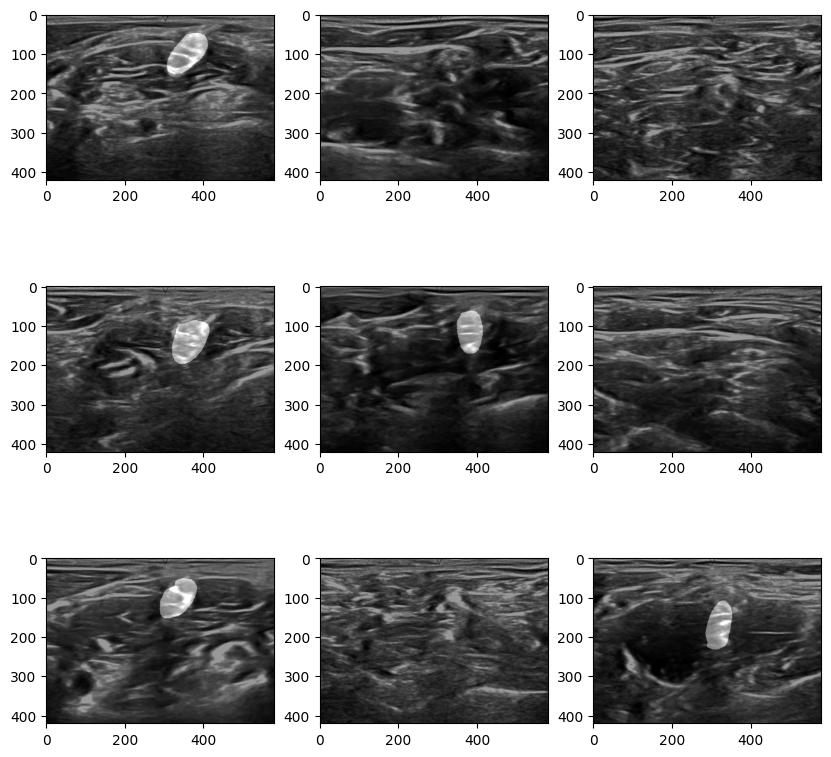

In [ ]:
rows,cols=3,3
fig=plt.figure(figsize=(10,10))
for i in range(1,rows*cols+1):
    ii = random.randint(0, len(df))
    fig.add_subplot(rows,cols,i)
    img_path=df['image'][ii]
    msk_path=df['mask'][ii]
    plt.imshow(np.array(Image.open(img_path)), cmap = 'gray')
    plt.imshow(np.array(Image.open(msk_path)),alpha=0.4, cmap = 'gray')
plt.show()

**Model**

Priprema podataka i postavljanje DataLoader-a za treniranje modela za segmentaciju nerava.

In [ ]:
def rle_encoding(x):
    dots = np.where(x.T.flatten()==1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def convert_to_tensor(x,**kwargs):
    return x.transpose(2,0,1).astype("float32")

def func_for_preprocessing(preprocessing_fn=None):
    transform = []
    if preprocessing_fn:
        transform.append(albumentations.Lambda(image=preprocessing_fn))
    transform.append(albumentations.Lambda(image=convert_to_tensor))
    return albumentations.Compose(transform)

def trainaugs():
    transform =  [
                albumentations.Resize(height=224,width=224,interpolation=Image.BILINEAR),
                albumentations.RandomBrightnessContrast(brightness_limit=0.15, contrast_limit=0),
                albumentations.ShiftScaleRotate(rotate_limit=15, shift_limit=0.15, scale_limit=0.2),
                albumentations.HorizontalFlip(),
            ]
    return albumentations.Compose(transform)

def valaugs():
    transform = [
                albumentations.Resize(height=224,width=224,interpolation=Image.BILINEAR),
            ]
    return albumentations.Compose(transform)


class GetDataset(Dataset):
    def __init__(self,imagespath,maskspath,augment=None,preprocess=None):
        self.imagespath = imagespath
        self.maskspath = maskspath
        self.augment = augment
        self.preprocess = preprocess

    def __len__(self):
        return len(self.imagespath)

    def __getitem__(self,idx):
        image = cv2.cvtColor(cv2.imread(self.imagespath[idx]),cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.maskspath[idx], cv2.IMREAD_GRAYSCALE)

        if self.augment:
            sample = self.augment(image=image, mask=mask)
            image,mask = sample['image'],sample['mask']
        if self.preprocess:
            sample = self.preprocess(image=image,mask=mask)
            image,mask = sample['image'],sample['mask']

        mask = (mask / 255).astype(np.float32)
        mask = np.expand_dims(mask, axis=0)

        return image,mask

Konstruisanje modela za segmentaciju nerava pomoću arhitekture U-Net, koristeći predobučene težine modela za konvolucijsku neuronsku mrežu (CNN) i postavlja DataLoader-e za treniranje i validaciju.

In [ ]:
encoder = "resnet34"
encoder_wts = "imagenet"
activation = "sigmoid"


model = smp.Unet(encoder_name=encoder,activation=activation,encoder_weights=encoder_wts)
preprocess_func = smp.encoders.get_preprocessing_fn(encoder,encoder_wts)


traindata = GetDataset(imagespath = df_train['image'].tolist(),
                            maskspath = df_train['mask'].tolist(),
                            augment = trainaugs(),
                            preprocess = func_for_preprocessing(preprocess_func))

validationdata = GetDataset(imagespath = df_val['image'].tolist(),
                            maskspath = df_val['mask'].tolist(),
                            augment = valaugs(),
                           preprocess = func_for_preprocessing(preprocess_func))

batch_size = 16
trainloader = DataLoader(traindata,batch_size = batch_size,shuffle=True)
valloader = DataLoader(validationdata,batch_size=batch_size,shuffle=False)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 117MB/s]


Postavljanje parametara za treniranje modela i definisanje nekoliko elemenata potrebnih za trening.

In [ ]:
from segmentation_models_pytorch import utils
trainmodel = True
epochs = 7
device = "cpu"
loss = smp.utils.losses.DiceLoss()
metrics = [ smp.utils.metrics.IoU(threshold=0.5) ]
optimizer = torch.optim.Adam([dict(params=model.parameters(), lr=0.001)])
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, epochs)

trainepoch = smp.utils.train.TrainEpoch(model,loss=loss,optimizer=optimizer,metrics=metrics,device=device,verbose=True)
validepoch = smp.utils.train.ValidEpoch(model,loss=loss,metrics=metrics,device=device,verbose=True)

**Treniranje**

Sprovodjenje treniranja i evaluaciju modela tokom određenog broja epoha, obučavanje algoritma kako bi što uspešnije vršio segmentaciju nerava.

In [ ]:
best_iou_score = 0.0
train_logs_list, valid_logs_list = [], []
for i in range(0,epochs):
    print('\nEpoch: {}'.format(i))
    trainlogs = trainepoch.run(trainloader)
    validlogs = validepoch.run(valloader)
    lr_scheduler.step()

    train_logs_list.append(trainlogs)
    valid_logs_list.append(validlogs)

    checkpoint_path = './model_checkpoint_epoch{}.pth'.format(i)
    torch.save({
        'epoch': i,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_iou_score': best_iou_score,
        'train_logs_list': train_logs_list,
        'valid_logs_list': valid_logs_list
    }, checkpoint_path)

    if best_iou_score < validlogs['iou_score']:
        best_iou_score = validlogs['iou_score']
        torch.save(model, './best_model.pth')


Epoch: 0
valid: 100%|██████████| 53/53 [04:28<00:00,  5.06s/it, dice_loss - 0.5387, iou_score - 0.3077]

Epoch: 1
valid: 100%|██████████| 53/53 [04:43<00:00,  5.34s/it, dice_loss - 0.4434, iou_score - 0.3949]

Epoch: 2
valid: 100%|██████████| 53/53 [04:53<00:00,  5.55s/it, dice_loss - 0.4367, iou_score - 0.4021]

Epoch: 3
valid: 100%|██████████| 53/53 [04:45<00:00,  5.39s/it, dice_loss - 0.3998, iou_score - 0.4375]

Epoch: 4
valid: 100%|██████████| 53/53 [04:42<00:00,  5.33s/it, dice_loss - 0.4074, iou_score - 0.4316]

Epoch: 5
valid: 100%|██████████| 53/53 [04:45<00:00,  5.39s/it, dice_loss - 0.3901, iou_score - 0.4502]

Epoch: 6
valid: 100%|██████████| 53/53 [04:40<00:00,  5.30s/it, dice_loss - 0.3905, iou_score - 0.4498]


**Evaluacija**

Vizuelna analiza performansi modela tokom treninga i validacije, odstupanje tokom epoha treniranja.

In [ ]:
train_logs_df = pd.DataFrame(train_logs_list)
valid_logs_df = pd.DataFrame(valid_logs_list)
train_logs_df.T

,0,1,2,3,4,5,6
dice_loss,0.629859,0.460954,0.446075,0.428158,0.404949,0.388332,0.379637
iou_score,0.262988,0.378092,0.392185,0.409409,0.431289,0.448795,0.457790


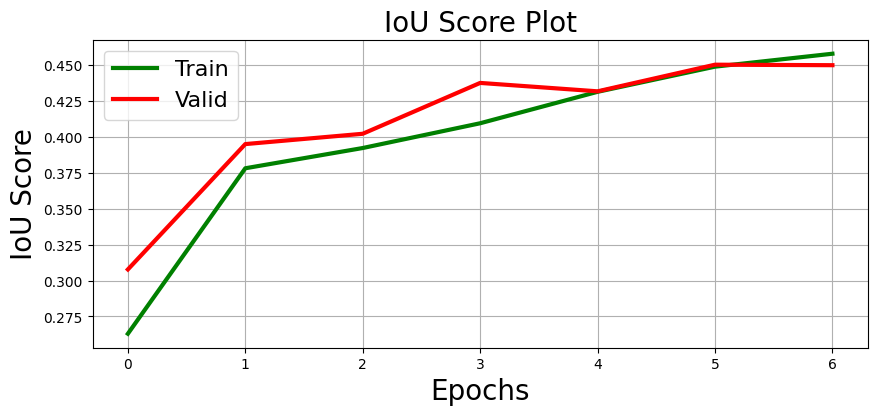

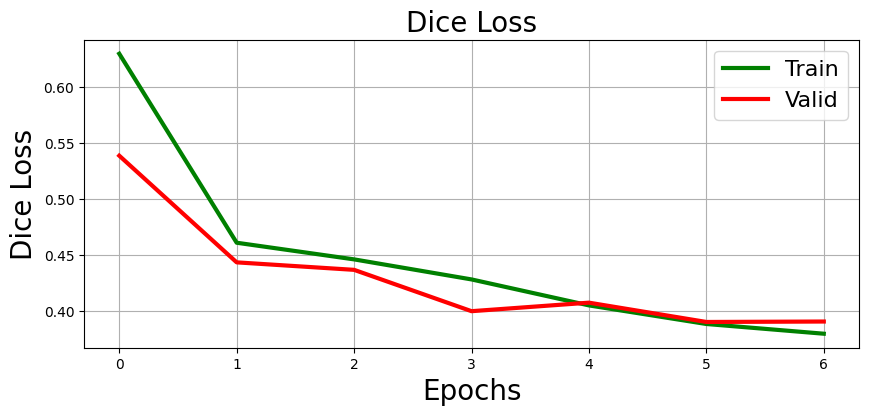

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(train_logs_df.index.tolist(), train_logs_df.iou_score.tolist(),'g-',lw=3, label = 'Train')
plt.plot(valid_logs_df.index.tolist(), valid_logs_df.iou_score.tolist(),'r-' ,lw=3, label = 'Valid')
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('IoU Score', fontsize=20)
plt.title('IoU Score Plot', fontsize=20)
plt.legend(loc='best', fontsize=16)
plt.grid()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(train_logs_df.index.tolist(), train_logs_df.dice_loss.tolist(),'g-',lw=3, label = 'Train')
plt.plot(valid_logs_df.index.tolist(), valid_logs_df.dice_loss.tolist(),'r-' ,lw=3, label = 'Valid')
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Dice Loss', fontsize=20)
plt.title('Dice Loss', fontsize=20)
plt.legend(loc='best', fontsize=16)
plt.grid()
plt.show()

**Testiranje**

Vizualizacija rezultata kako model segmentacije nerava radi na slučajno izabranim slikama iz testnog skupa podataka.

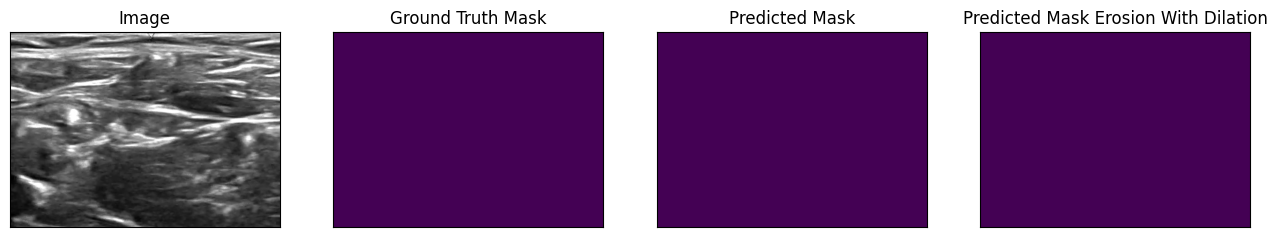

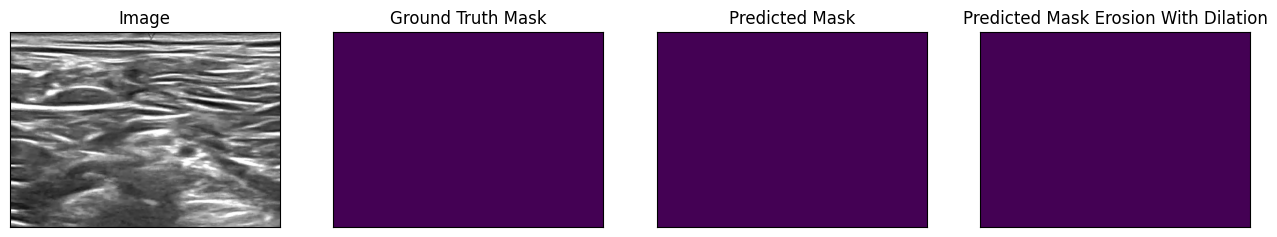

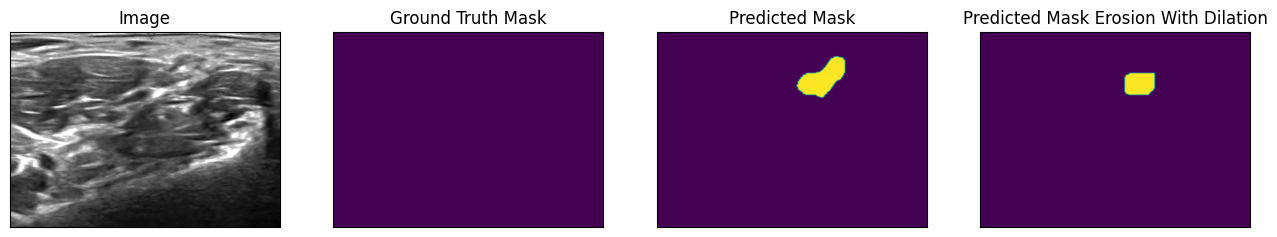

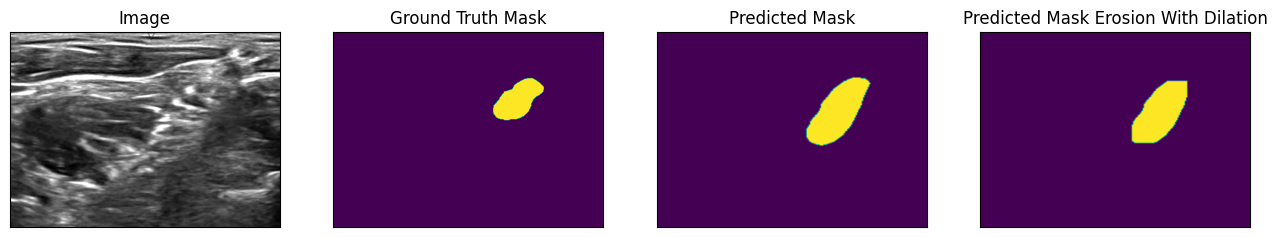

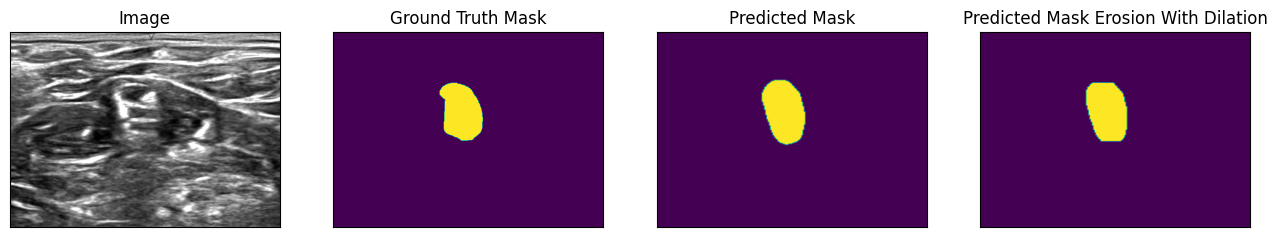

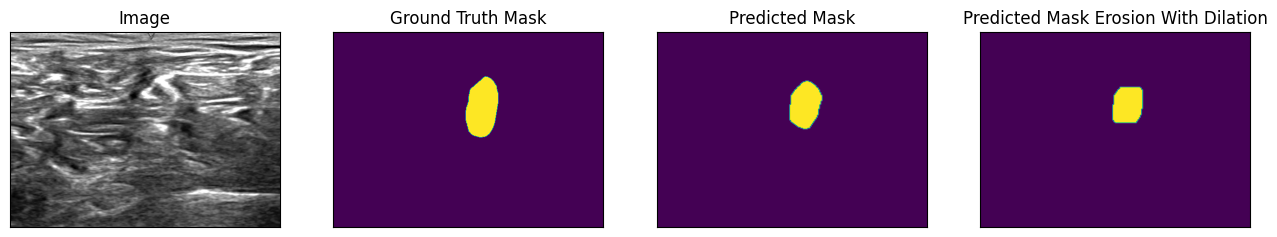

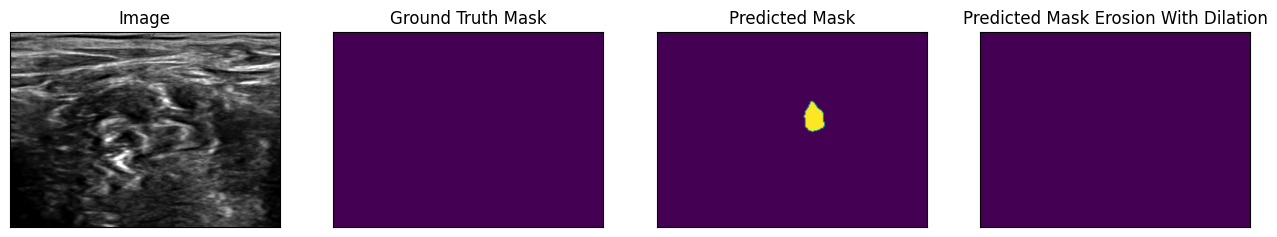

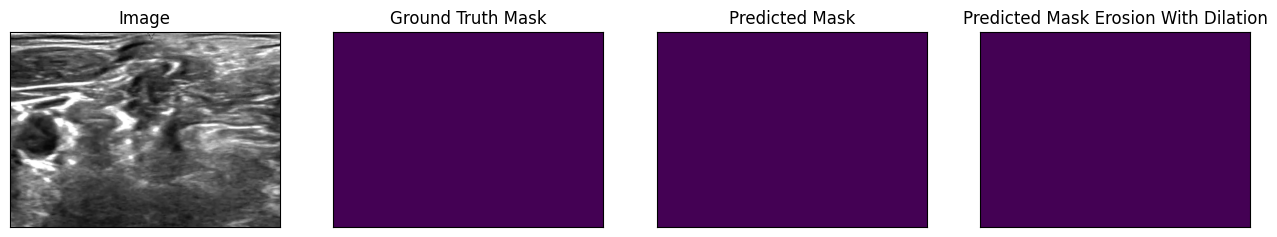

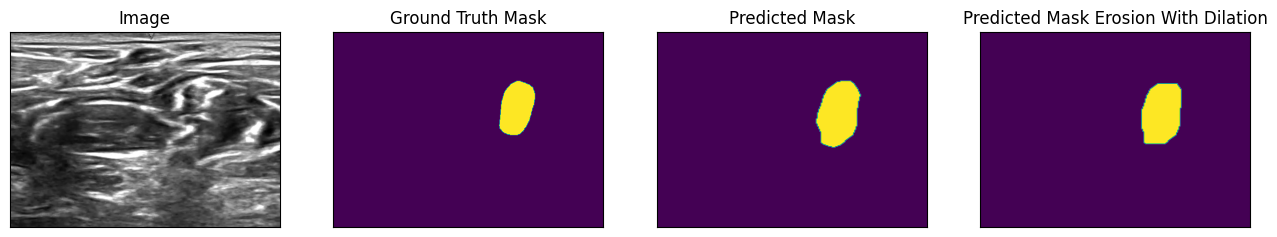

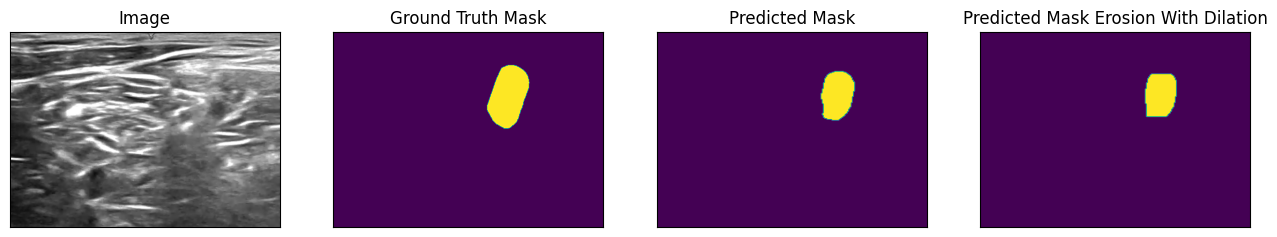

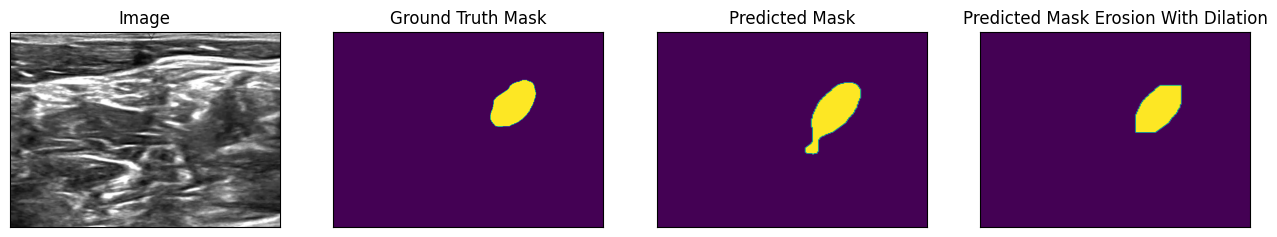

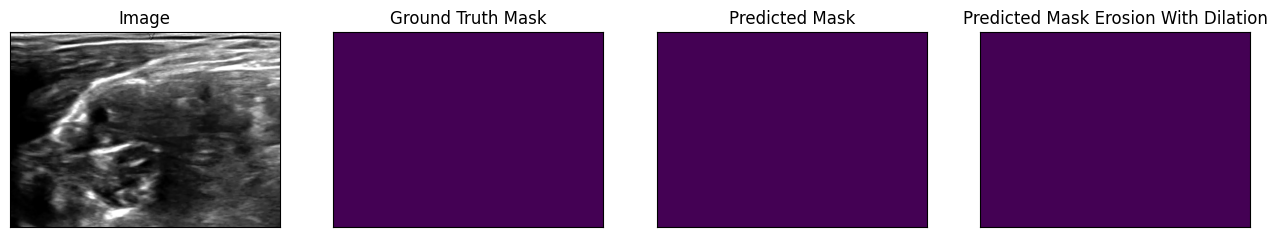

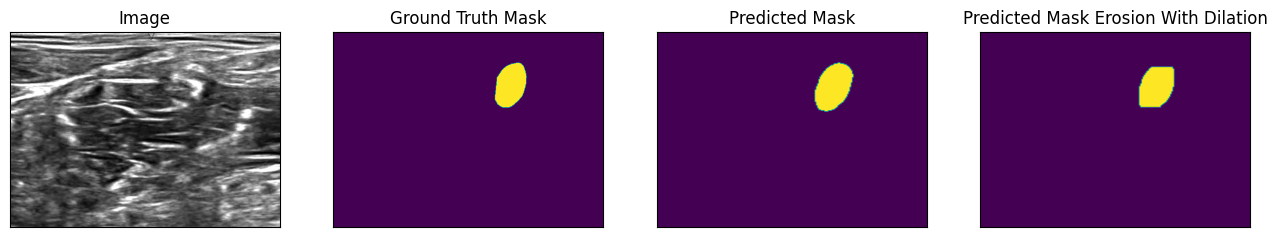

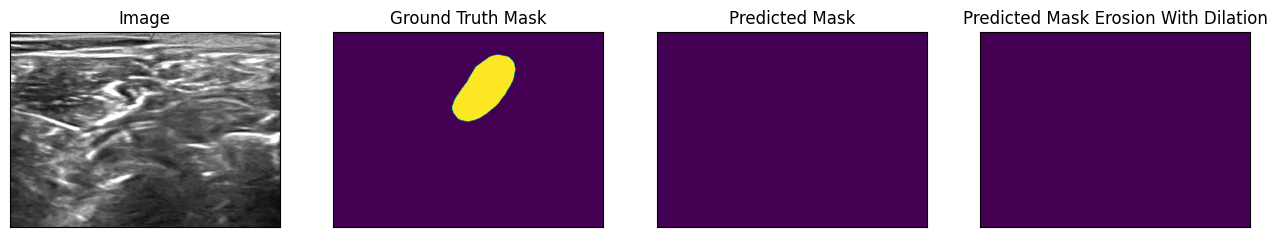

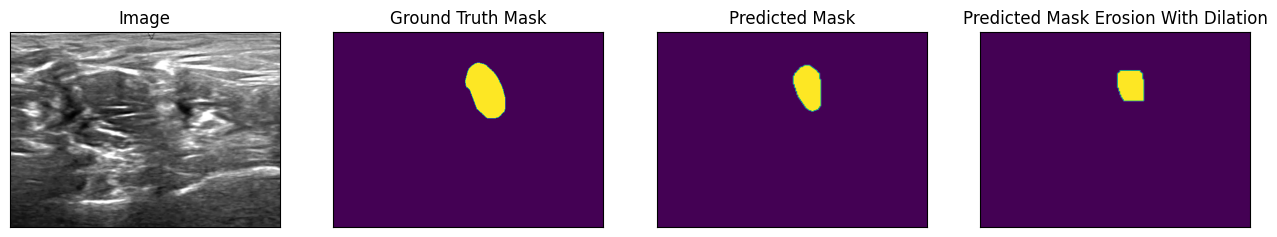

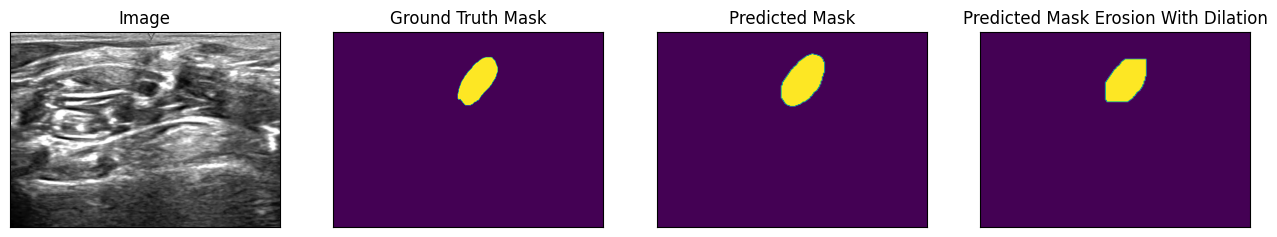

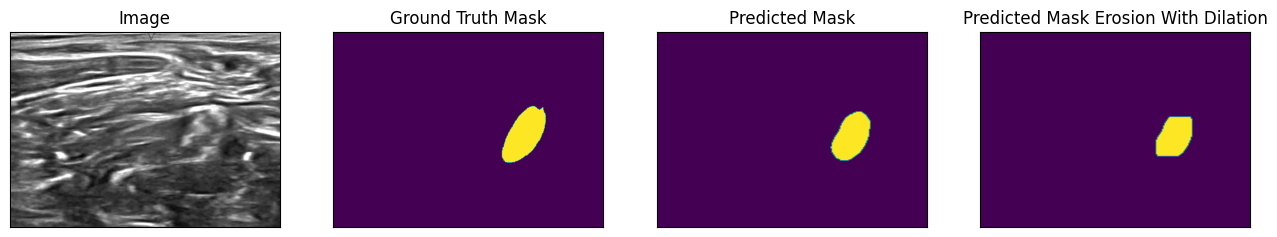

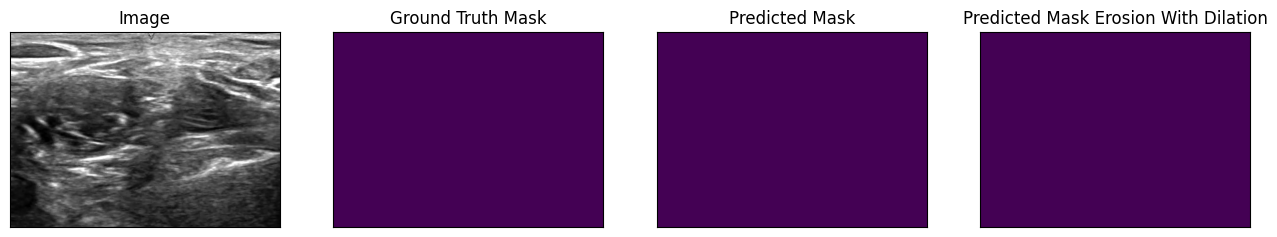

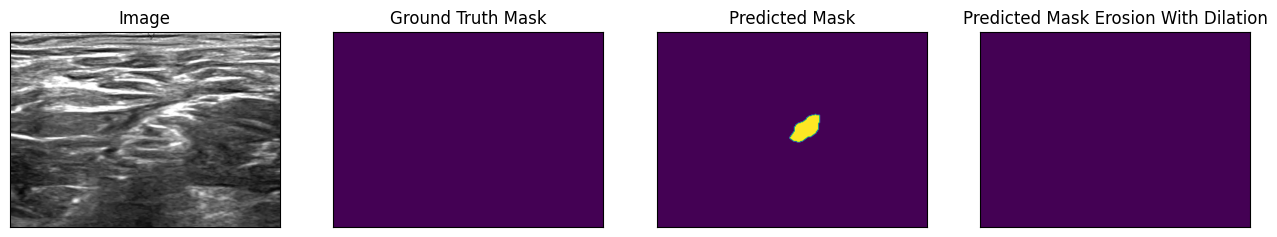

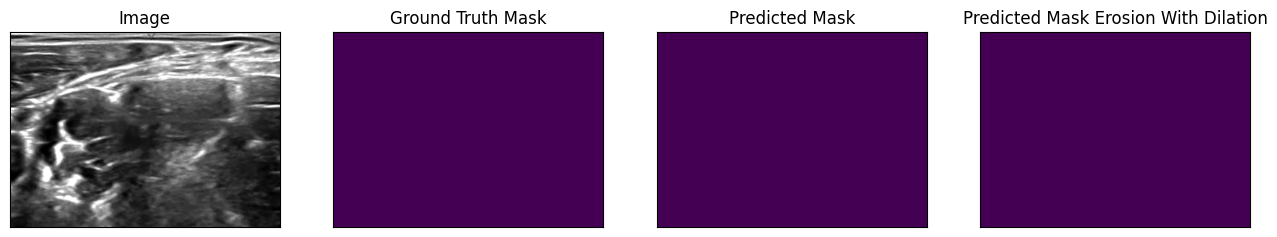

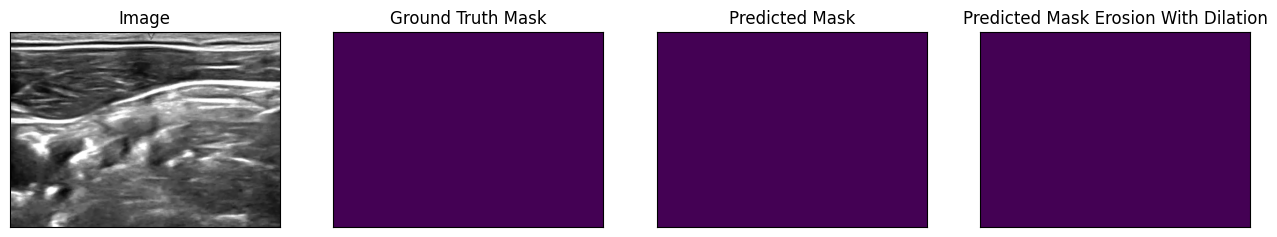

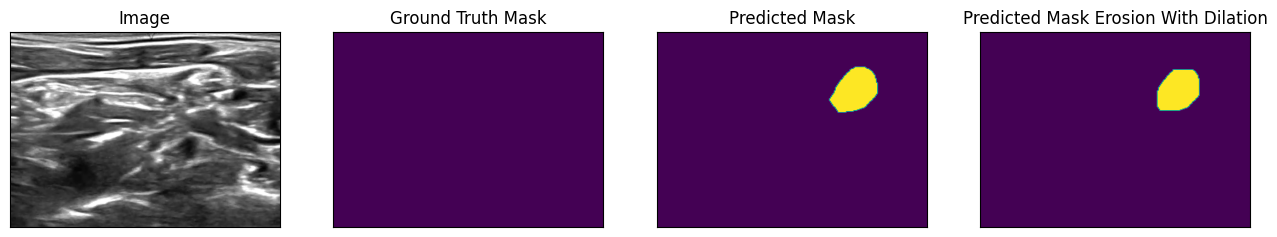

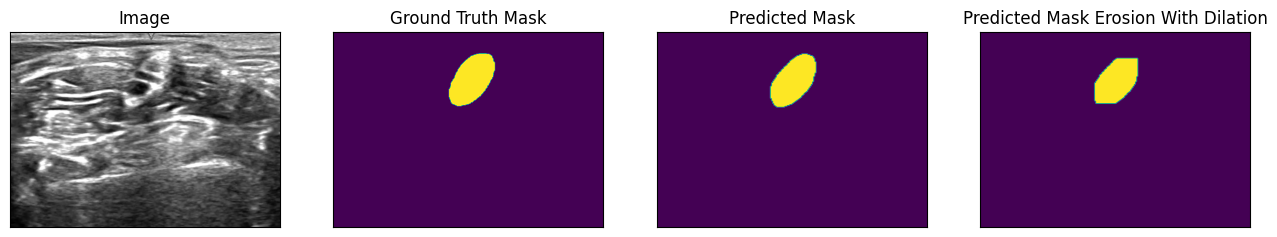

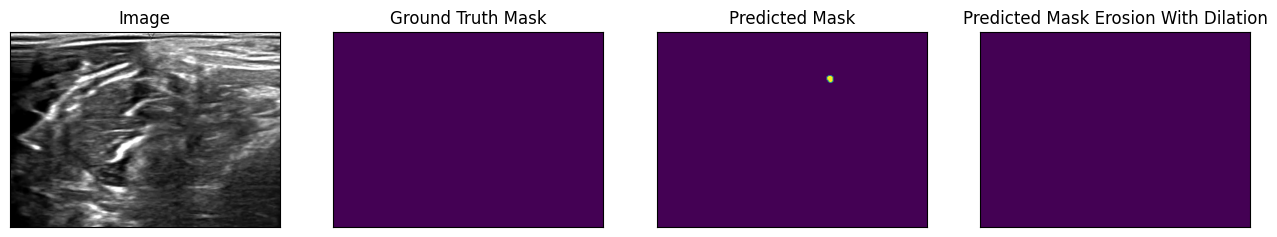

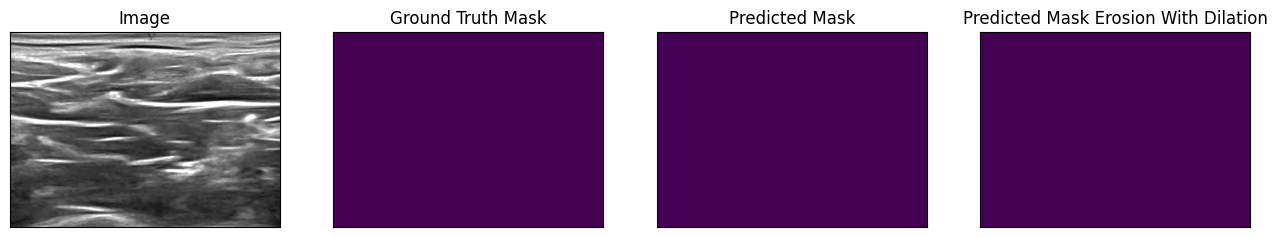

In [ ]:
best_model = torch.load('./best_model.pth')

test_dataset = GetDataset(imagespath = df_val['image'].tolist(),
                            maskspath = df_val['mask'].tolist(),
                            augment = valaugs(),
                           preprocess = func_for_preprocessing(preprocess_func))


test_dataset_vis = GetDataset(imagespath = df_val['image'].tolist(),
                            maskspath = df_val['mask'].tolist())


def visualize(**images):
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        if image.shape[0] == 3:
            image = image.transpose([1, 2, 0])
        plt.imshow(image)
    plt.show()

for i in range(25):
    n = np.random.choice(len(test_dataset))

    image_vis = test_dataset_vis[n][0].astype('uint8')
    mask_vis = test_dataset_vis[n][1].astype('uint8')
    image, gt_mask = test_dataset[n]

    gt_mask = gt_mask.squeeze()

    x_tensor = torch.from_numpy(image).to(device).unsqueeze(0)
    pr_mask = best_model.predict(x_tensor)
    pr_mask = pr_mask.squeeze().cpu().numpy().round()

    kernel = np.ones((5,5),np.uint8)
    pr_mask_er = cv2.erode(pr_mask,kernel,iterations = 4)
    pr_mask_er = cv2.dilate(pr_mask_er,kernel,iterations = 4)

    pr_mask = cv2.resize(pr_mask, (580, 420))
    pr_mask_er = cv2.resize(pr_mask_er, (580, 420))

    mask_vis = mask_vis.squeeze()

    visualize(
        image=image_vis,
        ground_truth_mask=mask_vis,
        predicted_mask=pr_mask,
        predicted_mask_erosion_with_dilation=pr_mask_er
    )

Pravi se submission fajl koji sadrži pretpostavke natreniranog modela. Za svaku sliku iz trening seta se prolazi i piše kolika je predikcija odnosno gde je predviđeno da se nalazi nerv.

In [ ]:
imgs = [f for f in os.listdir(testpath)]
imgs = sorted(imgs, key=lambda s: int(s.split('.')[0]))

encodings = []

for m in tqdm(imgs):
    x = cv2.imread(os.path.join(testpath, m))

    x = valaugs()(image=x)['image']
    x = func_for_preprocessing(preprocess_func)(image=x)['image']

    x_tensor = torch.from_numpy(x).to(device).unsqueeze(0)
    pr_mask = best_model.predict(x_tensor)

    pr_mask = pr_mask.squeeze().cpu().numpy().round().astype(np.uint8)
    pr_mask = albumentations.Resize(height=420,width=580,interpolation=Image.NEAREST)(image=pr_mask)['image']

    encodings.append(rle_encoding(pr_mask))

  0%|          | 0/5508 [00:00<?, ?it/s]

In [ ]:
df_submission = pd.DataFrame(columns=["img", "pixels"])
for i, encoding in enumerate(encodings):
    pixels = ' '.join(map(str, encoding))
    df_submission.loc[i] = [str(i+1), pixels]

df_submission.to_csv('submission.csv', index=False)